In [37]:
"""A Natural Language Processing (NLP) project using the Yelp review dataset to predict review star ratings based on text content. 
   The model uses CountVectorizer for feature extraction and Multinomial Naive Bayes for classification. Interestingly, the 
   CountVectorizer-based model outperformed the TF-IDF approach in accuracy and consistency.
"""

'A Natural Language Processing (NLP) project using the Yelp review dataset to predict review star ratings based on text content. \n   The model uses CountVectorizer for feature extraction and Multinomial Naive Bayes for classification. Interestingly, the \n   CountVectorizer-based model outperformed the TF-IDF approach in accuracy and consistency.\n'

In [2]:
# Import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
# Reading the Yelp dataset 
yelp = pd.read_csv('yelp.csv')

In [15]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [16]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [17]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [18]:
yelp['text length'] = yelp['text'].apply(len) 

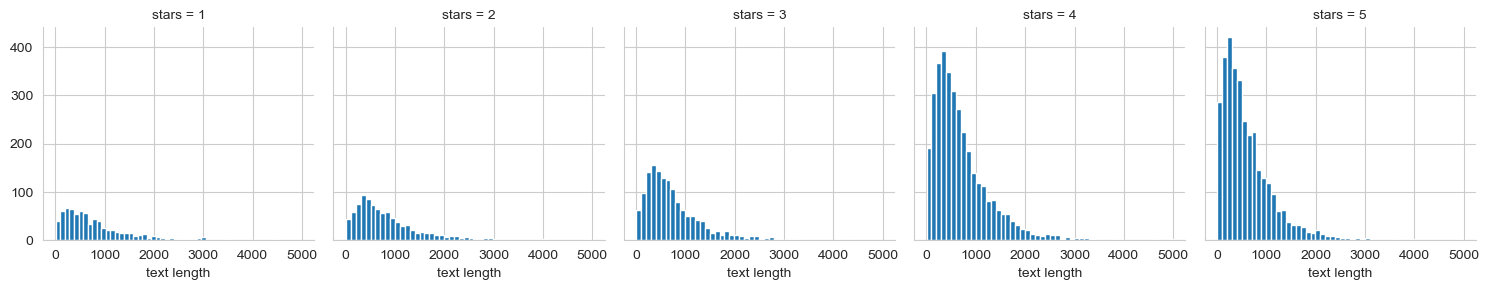

In [19]:
# EDA 
sns.set_style('whitegrid')
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)
plt.show()


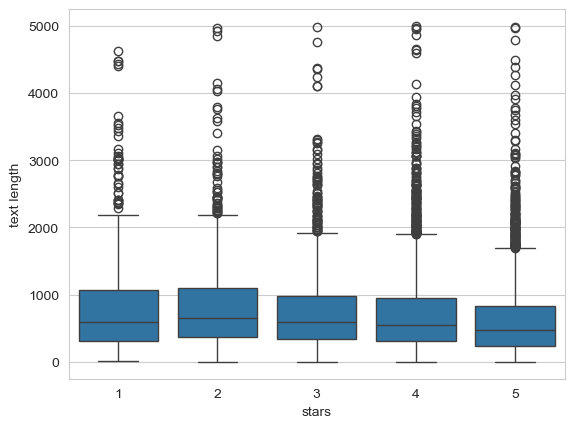

In [20]:
# Boxplor for text length by star rating
sns.boxplot(x='stars', y='text length', data=yelp)
plt.show()


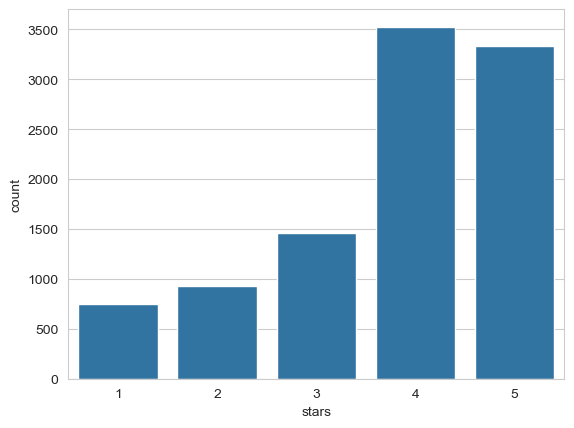

In [21]:
# Countplot for number of reviews for each star rating 

sns.countplot(x='stars', data=yelp)
plt.show()

In [24]:
stars = yelp.groupby('stars').mean(numeric_only=True)
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [26]:
# Correlation matrix based on the mean values of each column per star rating
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


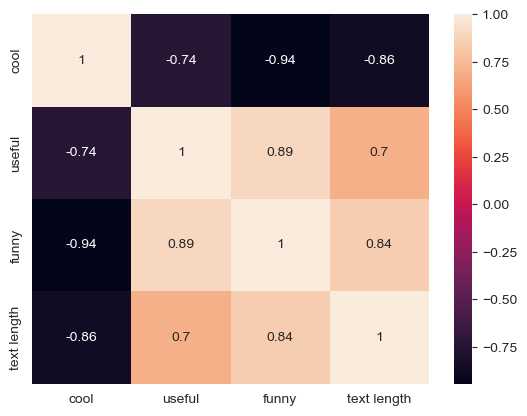

In [27]:
# Heatmap of the correlation matrix 

sns.heatmap(stars.corr(), annot=True)
plt.show()

In [28]:
# NLP Classification Task 
# Create a new dataframe with only 1 and 5 star reviews

yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]


In [29]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [30]:
X = yelp_class['text'] # Features 
y = yelp_class['stars'] # Target variable

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Vectorization

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Naive Bayes Classifier

nb = MultinomialNB()
nb.fit(X_train_cv, y_train)
predictions = nb.predict(X_test_cv)

# Evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           1       0.91      0.68      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.83      0.87      1226
weighted avg       0.93      0.93      0.92      1226

[[155  73]
 [ 15 983]]


In [31]:
# Using TF-IDF Vectorizer to this process using a pipeline

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline



In [32]:
pipe = Pipeline([('bow', CountVectorizer()), ('tfidf', TfidfTransformer()), ('classifier', MultinomialNB())])

In [33]:
# Using the pipeline to fit and predict the model 

# Redo the train test split 
X = yelp_class['text'] # Features
y = yelp_class['stars'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
# Fitting the pipeline to the training data 

pipe.fit(X_train, y_train)


Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [35]:
# Predictions and Evaluations 

predictions = pipe.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))    

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226

[[  0 228]
 [  0 998]]


c:\Coding_software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Coding_software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Coding_software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Conclusion: The pipeline using TF-IDF Vectorizer made things worst.  
# The Vectorizer and the Naive Bayes Classifier provides a much better result for the text classification in NLP.